# Camp Fire Simulation: Data Collection

## Load Software Packages

For basic setup: First, select the `Python 3-0.8.0` kernel within CyberGISX. Then, make sure the primary software packages are using the expected versions. Namely, Networkx should be `2.5.1` and OSMnx should be `1.0.1`.

In [1]:
# check networkx and osmnx versions
# note - need to use Python 3-0.8.0 Kernel (in CyberGISX)
import networkx
import osmnx
print("Networkx version is ", networkx.__version__) # expected version is 2.5.1
print("OSMnx version is ", osmnx.__version__) # expected version is 1.0.1

Networkx version is  2.6.2
OSMnx version is  1.1.1


If the versions are not the expected ones, install the correct versions by un-commenting out the two below pip install lines. You will need to restart the kernel after installation.

In [20]:
# uncomment the following two lines to install expected versions using pip

#%pip install --upgrade networkx==2.5.1
#%pip install --upgrade osmnx==1.0.1

# re -load check updated versions
import networkx
import osmnx
print("Networkx version is ", networkx.__version__) # expected version is 2.5.1
print("OSMnx version is ",osmnx.__version__) # expected version is 1.0.1

Networkx version is  2.6.2
OSMnx version is  1.1.1


Next, load general functions for the spatial agent based model from the Python code in `FireABM_opt_Keel.py`.

In [21]:
# import functions from main code base
from FireABM_opt_Keel import *

## Load Road Network Data for Paradise from OSMnx

The Camp Fire occurred on November 8, 2018. Change the `OSMnx` package settings to download data from before the fire, in this case, November 7, 2018. The `OSMnx` package downloads Open Street Map data using the `Overpass` tool. The `Overpass` tool accepts a date string to filter data.

### Data download setup

In [22]:
# Update Overpass settings to get historic data
settings = '''[out:json][timeout:{timeout}]{maxsize}''' # save existing settings
load_date = '''[date:"2018-11-07T00:00:00Z"]''' # set download date to send to Overpass (OSM data downloader)
# add date to Overpass settings
osmnx.settings.overpass_settings = settings+load_date
# check updated settings to make sure the date is added
osmnx.settings.overpass_settings

'[out:json][timeout:{timeout}]{maxsize}[date:"2018-11-07T00:00:00Z"]'

### Download data for Paradise

In this section, we set a central address point for the City of Paradise, CA and download two street networks. The first is within a 2000 meter bounding box of the central point for easy testing, and the second is within an 8000 meter bounding box of the central point to cover the urban area.

In [107]:
# set a central address for Paradise
central_addresses = ['6161 Clark Rd, Paradise, CA 95969']
dist = [2000, 8000]

In [108]:
# download data within an 2000 meter bounding box of the central address
camp_road_graph_2000_11_07_18 = ox.graph_from_address(
                central_addresses[0], dist=dist[0], dist_type='bbox',
                network_type='drive_service',
                clean_periphery=True, truncate_by_edge=True)

In [109]:
# download data within an 8000 meter bounding box of the central address
camp_road_graph_8000_11_07_18 = ox.graph_from_address(
                central_addresses[0], dist=dist[1], dist_type='bbox',
                network_type='drive_service',
                clean_periphery=True, truncate_by_edge=True)

### Plot graphs to check downloaded data

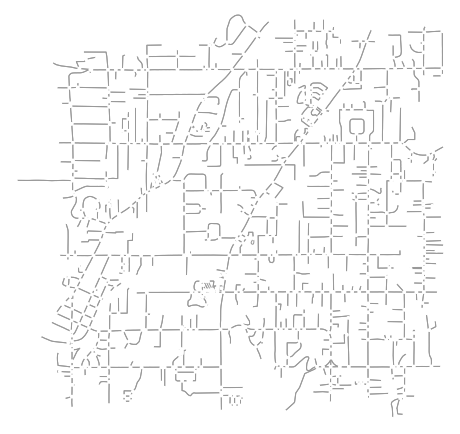

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [110]:
osmnx.plot_graph(camp_road_graph_2000_11_07_18, bgcolor='#ffffff')

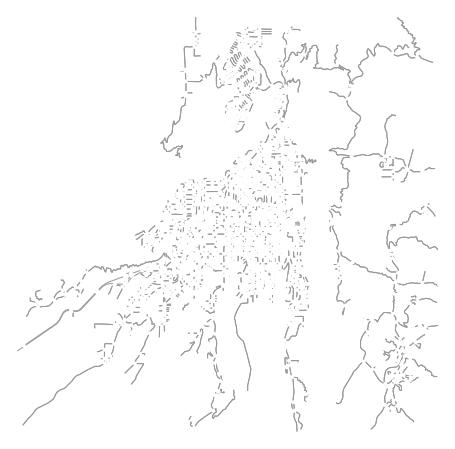

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [111]:
osmnx.plot_graph(camp_road_graph_8000_11_07_18, bgcolor='#ffffff')

In [112]:
osmnx.save_graphml(camp_road_graph_2000_11_07_18, filepath="camp_road_graph_2000_11_07_18.graphml")
osmnx.save_graphml(camp_road_graph_8000_11_07_18, filepath="camp_road_graph_8000_11_07_18.graphml")

### Load Saved Street Network Data

In [23]:
camp_road_graph_2000_11_07_18 = osmnx.load_graphml(filepath="camp_road_graph_2000_11_07_18.graphml")
camp_road_graph_8000_11_07_18 = osmnx.load_graphml(filepath="camp_road_graph_8000_11_07_18.graphml")
camp_road_graph_8000 = osmnx.load_graphml(filepath="camp_road_graph_8000.graphml")

## Load Municipal Boundaries for Paradise

City boundaries for California cities can be downloaded from the California State Geoportal. This dataset is `California City Boundaries and Identifiers with Coastal Buffers`, authored by the `California Department of Technology`, and can be downloaded from the following link: https://gis.data.ca.gov/datasets/be8a1cd8eff242b0a25feb54e5a2f5a6_2/explore . 

The original California City Boundaries file is too large to host on GitHub. Refer to the `Load Paradise Boundaries` notebook to extract boundaries for Paradise from this file and save as `Paradise_bounds.geojson`. 

In [24]:
paradise_bd = gpd.read_file('Paradise_bounds.geojson')

<AxesSubplot:>

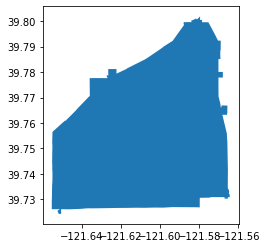

In [25]:
paradise_bd.plot()

## Plot Road Network and Paradise boundary

In [26]:
gdf_nodes, gdf_edges = get_node_edge_gdf(camp_road_graph_8000_11_07_18)

In [27]:
gdf_nodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

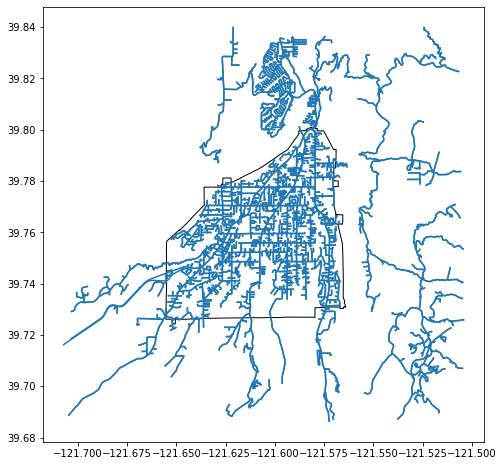

In [28]:
fig, ax = plt.subplots(figsize=(10, 8))
gdf_edges.plot(ax=ax)
paradise_bd.plot(ax=ax, facecolor="none", 
              edgecolor='black')

In [29]:
gdf_nodes2, gdf_edges2 = get_node_edge_gdf(camp_road_graph_8000)

<AxesSubplot:>

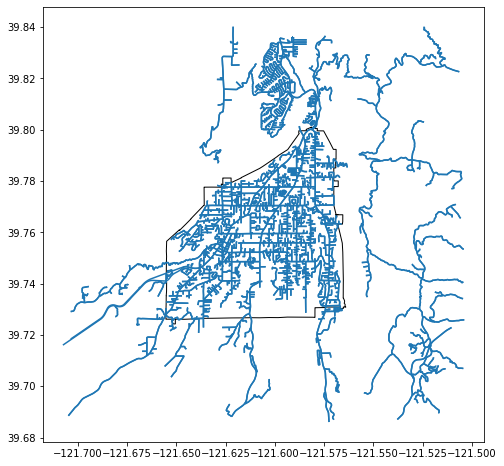

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))
gdf_edges2.plot(ax=ax)
paradise_bd.plot(ax=ax, facecolor="none", 
              edgecolor='black')

## Access Households Data

### Access Census Tracts geometry data for Butte County, CA

2018 TIGER/Line Shapefiles for Census Tracts were downloaded for California from https://www.census.gov/cgi-bin/geo/shapefiles/index.php.

Steps to download:

1. Go to https://www.census.gov/cgi-bin/geo/shapefiles/index.php
2. Select filters:
    - Year: 2018
    - Geometry type: Census Tract
    - State: California
3. Download Census Tracts for California

The original Census Tracts file for California is too large to host on GitHub. Refer to the `Load Paradise Boundaries` notebook for steps to extract census tracts for Butte County from this file and save as `butte_tracts.shp`.

### Access Census Data on Households for Butte County, CA

Household data is used to initially place vehicles in proportion to households within census tracts. Households data have been gathered from [US Census Data Table S1101 2014-2018](https://data.census.gov/cedsci/table?q=S1101&tid=ACSST1Y2018.S1101) American Community Survey 5-Year Estimates, Table S1101. You can download a CSV from the Census Bureau with household data and join to census tract shapefiles that have been also downloaded from the Census Bureau. Although this simulation code expects census tracts, it could be modified to use other geographic areas.

This shapefile contains basic information about the census tract from the Census Bureau and the number of households per census tract has been joined to the shapefile. Important columns here are Tot_Est_HH, which contains the ACS estimate of total households per census tract from the above table, and geometry with the census tract geometry.

Steps to download:

1. Go to the Census data page for table S1101 (https://data.census.gov/cedsci/table?q=S1101&tid=ACSST1Y2018.S1101)
2. Select 2018 5 year estimates
3. Select Geography filter
    - Census Tract -> All Census Tracts for Butte County, CA
4. Download filtered tabular data

### Join Households Data to Census Tract Geometries

Refer to the `Load Paradise Boundaries` notebook for steps to clean the households data and join it to the census tract geometries. This will result in a shapefile of households per census tract, which we have named `Butte_tracts_HH.shp`.

## Generate Wildfire Perimeters for the Camp Fire

### NIST Data

The National Institute of Standards and Technology published a report on the Camp Fire, titled "A Case Study of the Camp Fire –
Fire Progression Timeline". This report is avaibale at https://doi.org/10.6028/NIST.TN.2135. This report contains observations of the Camp Fire and contains a series of maps detailing the fire progression (Maps 2-14).

### Digitizing Process

2019 Tiger/Line Road and Water Shapefiles were downloaded from the US Census to use as references. Maps were georeferenced in ESRI ArcGIS, and fire locations were digitized from the NIST Maps in ESRI ArcMap 10.6.

### Processing Fire Point Reports to Aproximate Perimeters

First we will load the raw digitized fire reports data to explore the dataset.

In [31]:
# read raw digitizedfire reports data
fire_reports = gpd.read_file('fire_input/fire_reports.shp')
fire_reports.head()

,Id,fire_type,start_time,end_time,geometry
0,0,veg,625,745,POINT (6720673.168 2423204.039)
1,1,veg,625,745,POINT (6720437.925 2422551.695)
2,2,veg,625,745,POINT (6720672.300 2423260.028)
3,3,veg,625,745,POINT (6718757.370 2420787.806)
4,4,veg,625,745,POINT (6717250.425 2420204.473)


<AxesSubplot:>

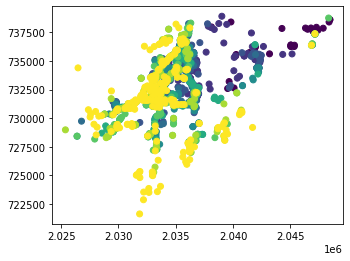

In [192]:
# plot by start time
fire_reports.plot("start_time")

### Plot Camp Fire Reports with Road Network

To check the spatial extent of the fire report data, here we will plot the fire spread points over the Paradise Road Network.

In [34]:
# change CRS to match street network data
fire_reports_pt = fire_reports.to_crs("EPSG:4326")

<AxesSubplot:>

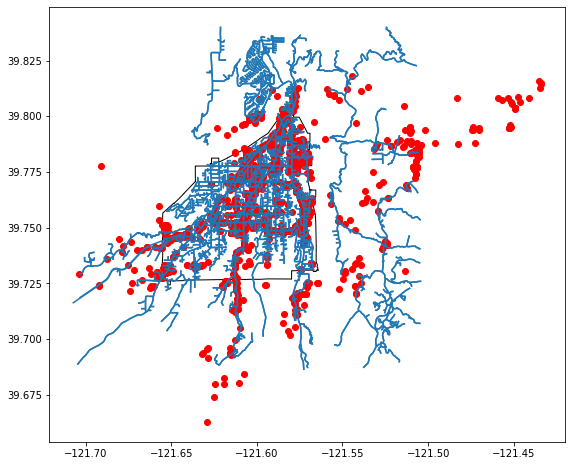

In [35]:
# plot fire spread points with street network
fig, ax = plt.subplots(figsize=(10, 8))
gdf_edges.plot(ax=ax)
paradise_bd.plot(ax=ax, facecolor="none", 
              edgecolor='black')
fire_reports_pt.plot(ax=ax, facecolor="red")

### Add SimTime column

The `SimTime` column is expected to represent elapsed time since the start of the fire in minutes. We can calculate the difference between each time value and the initial starting time and add it as a new column. Note that `625`, the first start time, represents 6:25am, which will be assigned to a `SimTime` value of `0`. 7:45am, the next time record, is 120 minutes later, and will be assigned the`SimTime` value of `120`.

In [36]:
# add 'SimTime' colum of elapsed fire tiem
fire_reports['SimTime'] = fire_reports['start_time']-625

In [37]:
fire_reports

,Id,fire_type,start_time,end_time,geometry,SimTime
0,0,veg,625,745,POINT (6720673.168 2423204.039),0
1,1,veg,625,745,POINT (6720437.925 2422551.695),0
2,2,veg,625,745,POINT (6720672.300 2423260.028),0
3,3,veg,625,745,POINT (6718757.370 2420787.806),0
4,4,veg,625,745,POINT (6717250.425 2420204.473),0
...,...,...,...,...,...,...
1585,1585,gen,1400,1600,POINT (6652172.514 2396279.763),775
1586,1586,veg,1400,1600,POINT (6651478.070 2397425.597),775
1587,1587,veg,1400,1600,POINT (6653544.042 2396922.124),775
1588,1588,veg,1400,1600,POINT (6654464.181 2395585.319),775


### Convert Fire Point Reports to Polygons

The simulation expects input wildfire perimeters as polygons. In the NIST dataset, point locations represent spots where fire occurance was reported but the dataset did not contain information about local fire extent. We estimated area of impact for the fire locations by calculating a 30 meter buffer around fire spot reports based on the following data.

[Seto et al. 2022](https://doi.org/10.3390/fire5020037), estimated over 63.7 precent fuel fraction inside the 2018 Camp Fire observed burn perimeter could be classified as either "Timber Understory" or "Timber Liter". Based on fire safety distance calculations by [Zárate et al. 2008](https://doi.org/10.1016/j.firesaf.2008.01.001), we used the minimum safety distance of 30 meters for "Timber (litter and understory)" surface fire fuel category (classified for persons with protection) to determine an impact buffer for point fire reports. 

To create fire perimeter polygons, we run calculate 30 meter for the point fire distributions in each time segment.

In [48]:
# get list of time intervals by simulation time
set(fire_reports["SimTime"])

{0, 120, 205, 275, 375, 475, 575, 675, 775}

In [174]:
# subset by simtime
# Change crs to meters for easier intervals
fire_reports = fire_reports.to_crs("EPSG:6417")
fire_reports_0 = fire_reports[fire_reports["SimTime"] == 0]
fire_reports_120 = fire_reports[fire_reports["SimTime"] == 120]
fire_reports_205 = fire_reports[fire_reports["SimTime"] == 205]
fire_reports_275 = fire_reports[fire_reports["SimTime"] == 275]
fire_reports_375 = fire_reports[fire_reports["SimTime"] == 375]
fire_reports_475 = fire_reports[fire_reports["SimTime"] == 475]
fire_reports_575 = fire_reports[fire_reports["SimTime"] == 575]
fire_reports_675 = fire_reports[fire_reports["SimTime"] == 675]
fire_reports_775 = fire_reports[fire_reports["SimTime"] == 775]

# create buffers
# for each buffer, run buffer, calculate unary_union to combine overlapping areas, then convert to geoseries and reset CRS
fire_reports_0_30m = gpd.GeoSeries(fire_reports_0.buffer(30).unary_union)
fire_reports_0_30m = fire_reports_0_30m.set_crs("EPSG:6417")

fire_reports_120_30m = gpd.GeoSeries(fire_reports_120.buffer(30).unary_union)
fire_reports_120_30m = fire_reports_120_30m.set_crs("EPSG:6417")

fire_reports_205_30m = gpd.GeoSeries(fire_reports_205.buffer(30).unary_union)
fire_reports_205_30m = fire_reports_205_30m.set_crs("EPSG:6417")

fire_reports_275_30m = gpd.GeoSeries(fire_reports_275.buffer(30).unary_union)
fire_reports_275_30m = fire_reports_275_30m.set_crs("EPSG:6417")

fire_reports_375_30m = gpd.GeoSeries(fire_reports_375.buffer(30).unary_union)
fire_reports_375_30m = fire_reports_375_30m.set_crs("EPSG:6417")

fire_reports_475_30m = gpd.GeoSeries(fire_reports_475.buffer(30).unary_union)
fire_reports_475_30m = fire_reports_475_30m.set_crs("EPSG:6417")

fire_reports_575_30m = gpd.GeoSeries(fire_reports_575.buffer(30).unary_union)
fire_reports_575_30m = fire_reports_575_30m.set_crs("EPSG:6417")

fire_reports_675_30m = gpd.GeoSeries(fire_reports_675.buffer(30).unary_union)
fire_reports_675_30m = fire_reports_675_30m.set_crs("EPSG:6417")

fire_reports_775_30m = gpd.GeoSeries(fire_reports_775.buffer(30).unary_union)
fire_reports_775_30m = fire_reports_775_30m.set_crs("EPSG:6417")

# Join the data back to create a dataframe
fr_data = {'SimTime': [0, 120, 205, 275, 375, 475, 575, 675, 775], 
           'geometry': [fire_reports_0_30m.geometry.values[0],
                        fire_reports_120_30m.geometry.values[0],
                        fire_reports_205_30m.geometry.values[0],
                        fire_reports_275_30m.geometry.values[0],
                        fire_reports_375_30m.geometry.values[0],
                        fire_reports_475_30m.geometry.values[0],
                        fire_reports_575_30m.geometry.values[0],
                        fire_reports_675_30m.geometry.values[0],
                        fire_reports_775_30m.geometry.values[0]]}
fire_reports_30m_full = gpd.GeoDataFrame(fr_data, crs="EPSG:6417")
# explode to create break multipolygons into rows of single polygons
fire_reports_30m_full = fire_reports_30m_full.explode()

In [188]:
# preview subsection of final dataframe
fire_reports_30m_full[fire_reports_30m_full['SimTime'] == 575]

SimTime                                           geometry
6 0        575  POLYGON ((2036366.270 727022.357, 2036366.126 ...
  1        575  POLYGON ((2033071.011 727204.522, 2033070.866 ...
  2        575  POLYGON ((2033395.126 727287.866, 2033394.981 ...
  3        575  POLYGON ((2033358.084 727418.835, 2033357.940 ...
  4        575  POLYGON ((2033343.532 727602.721, 2033343.388 ...
...        ...                                                ...
  148      575  POLYGON ((2048384.992 738746.597, 2048384.848 ...
  149      575  POLYGON ((2035973.826 735783.720, 2035973.682 ...
  150      575  POLYGON ((2035903.976 735818.645, 2035903.832 ...
  151      575  POLYGON ((2034655.537 731844.067, 2034655.393 ...
  152      575  POLYGON ((2033819.651 731885.408, 2033819.506 ...

[153 rows x 2 columns]

<AxesSubplot:>

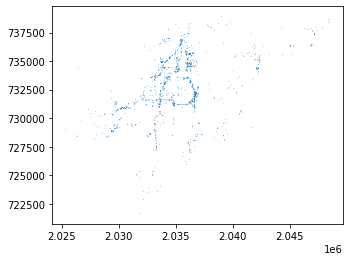

In [189]:
fire_reports_30m_full.plot()

## Export fire reports with buffers to shapefile

Finally we save the processed file as a shapefile to use in the simulation.

In [191]:
# set crs
fire_reports_30m_full = fire_reports_30m_full.to_crs("EPSG:6417")
# export to shapefile
fire_reports_30m_full.to_file('fire_input/camp_fire.shp') 